In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from urllib.parse import urlparse

### Loading Data

#### Python

In [2]:
jsonq = pd.read_json('Results/Python/JSON/json-queries-performance.json')

In [3]:
pandasq = pd.read_json('Results/Python/PANDAS/pandas-queries-performance.json') 

In [4]:
postq = pd.read_json('Results/Python/POST/post-queries-performance.json')

#### Wayang

In [5]:
wayang_jsonq = pd.read_json('Results/Wayang/JSON/json-queries-performance.json',convert_dates=False)

In [6]:
wayang_jsonq_api = pd.read_json('Results/Wayang/JSON/json-api-latency.json',convert_dates=False)

In [7]:
wayang_jsonq_api['base_url'] = wayang_jsonq_api['url'].apply(lambda x: urlparse(x).netloc)
wayang_jsonq_api['url_group'] = (wayang_jsonq_api['base_url'] != wayang_jsonq_api['base_url'].shift()).cumsum()
wayang_jsonq_api = wayang_jsonq_api.groupby('url_group').agg({
    'base_url': 'first',  
    'latency_seconds': 'sum'  
}).reset_index(drop=True)

In [8]:
wayang_postq = pd.read_json('Results/Wayang/POST/post-queries-performance.json',convert_dates=False)

In [9]:
wayang_postq_api = pd.read_json('Results/Wayang/POST/post-api-latency.json',convert_dates=False)

In [10]:
wayang_postq_api['base_url'] = wayang_postq_api['url'].apply(lambda x: urlparse(x).netloc)
wayang_postq_api['url_group'] = (wayang_postq_api['base_url'] != wayang_postq_api['base_url'].shift()).cumsum()
wayang_postq_api = wayang_postq_api.groupby('url_group').agg({
    'base_url': 'first',  
    'latency_seconds': 'sum'  
}).reset_index(drop=True)

#### Java

In [11]:
java_jsonq = pd.read_json('Results/Standalone/JSON/json-queries-performance.json',convert_dates=False)

In [12]:
java_jsonq_api = pd.read_json('Results/Standalone/JSON/json-api-latency.json',convert_dates=False)

In [13]:
java_jsonq_api['base_url'] = java_jsonq_api['url'].apply(lambda x: urlparse(x).netloc)
java_jsonq_api['url_group'] = (java_jsonq_api['base_url'] != java_jsonq_api['base_url'].shift()).cumsum()
java_jsonq_api = java_jsonq_api.groupby('url_group').agg({
    'base_url': 'first',  
    'latency_seconds': 'sum'  
}).reset_index(drop=True)

In [14]:
java_postq = pd.read_json('Results/Standalone/POST/post-queries-performance.json',convert_dates=False)

In [15]:
java_postq_api = pd.read_json('Results/Standalone/POST/post-api-latency.json',convert_dates=False)

In [16]:
java_postq_api['base_url'] = java_postq_api['url'].apply(lambda x: urlparse(x).netloc)
java_postq_api['url_group'] = (java_postq_api['base_url'] != java_postq_api['base_url'].shift()).cumsum()
java_postq_api = java_postq_api.groupby('url_group').agg({
    'base_url': 'first',  
    'latency_seconds': 'sum'  
}).reset_index(drop=True)

#### Box Plots

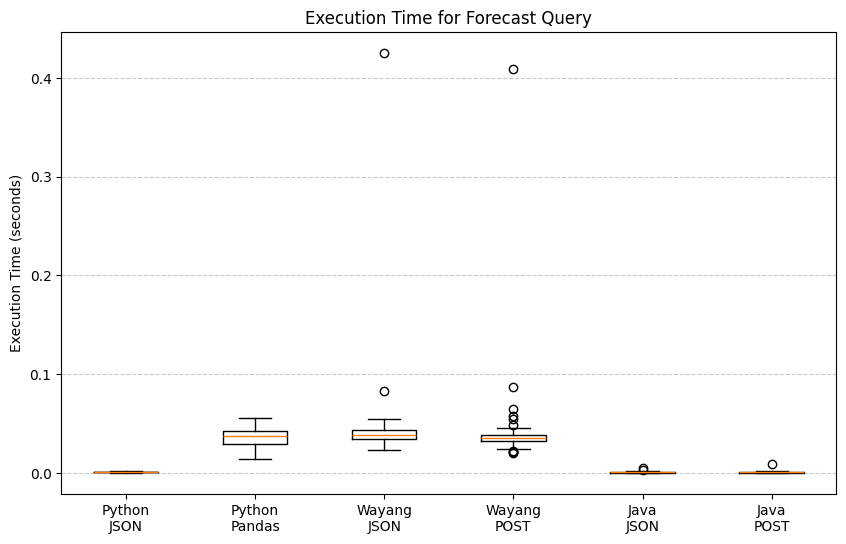

In [23]:
data1 = jsonq[jsonq['step'] == "Forecast Query"]['execution_time_seconds']
data2 = pandasq[pandasq['step'] == "Forecast Query"]['execution_time_seconds']
data3 = wayang_jsonq[wayang_jsonq['step'] == "Forecast Query"]['execution_time_seconds'].reset_index(drop = True) - wayang_jsonq_api[wayang_jsonq_api['base_url'] == "api.forecastapp.com"]['latency_seconds'].reset_index(drop=True)
data4 = wayang_postq[wayang_postq['step'] == "Forecast Query"]['execution_time_seconds'].reset_index(drop = True) - wayang_postq_api[wayang_postq_api['base_url'] == "api.forecastapp.com"]['latency_seconds'].reset_index(drop=True)
data5 = java_jsonq[java_jsonq['step'] == 'Forecast Query']['execution_time_seconds']
data6 = java_postq[java_postq['step'] == 'Forecast Query']['execution_time_seconds']

forecast = [data1, data2, data3, data4, data5, data6]

plt.figure(figsize=(10, 6))
plt.boxplot(forecast)
x_labels = [
    "Python\nJSON",
    "Python\nPandas",
    "Wayang\nJSON",
    "Wayang\nPOST",
    "Java\nJSON",
    "Java\nPOST",
]
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Execution Time for Forecast Query')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

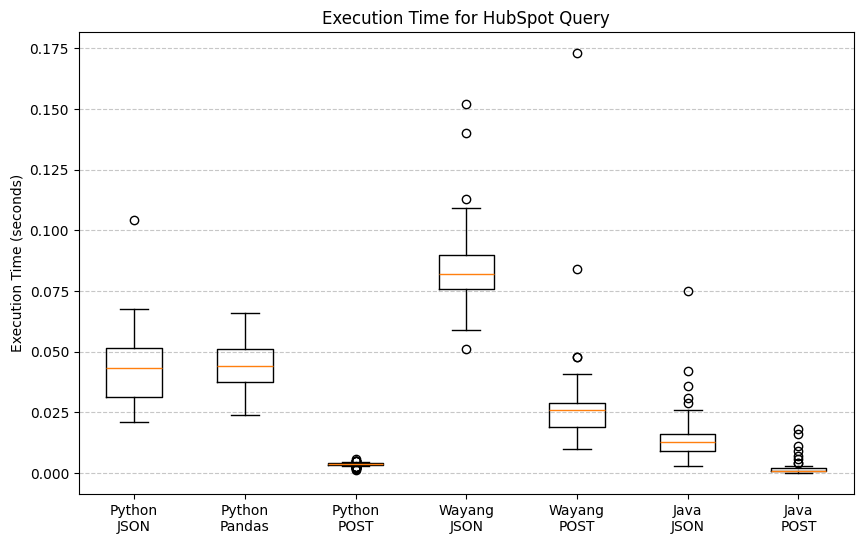

In [18]:
data1 = jsonq[jsonq['step'] == "HubSpot Query"]['execution_time_seconds']
data2 = pandasq[pandasq['step'] == "HubSpot Query"]['execution_time_seconds']
data3 = postq[postq['step'] == "HubSpot Query"]['execution_time_seconds']
data4 = wayang_jsonq[wayang_jsonq['step'] == 'HubSpot Query']['execution_time_seconds']
data5 = wayang_postq[wayang_postq['step'] == 'HubSpot Query']['execution_time_seconds']
data6 = java_jsonq[java_jsonq['step'] == 'HubSpot Query']['execution_time_seconds']
data7 = java_postq[java_postq['step'] == 'HubSpot Query']['execution_time_seconds']


hubspot = [data1, data2,data3, data4, data5, data6, data7]

plt.figure(figsize=(10, 6))
plt.boxplot(hubspot)
x_labels = [
    "Python\nJSON",
    "Python\nPandas",
    "Python\nPOST",
    "Wayang\nJSON",
    "Wayang\nPOST",
    "Java\nJSON",
    "Java\nPOST",
]
plt.xticks(range(1, len(x_labels) + 1), x_labels)
plt.title('Execution Time for HubSpot Query')
plt.ylabel('Execution Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

0.9240800285224706


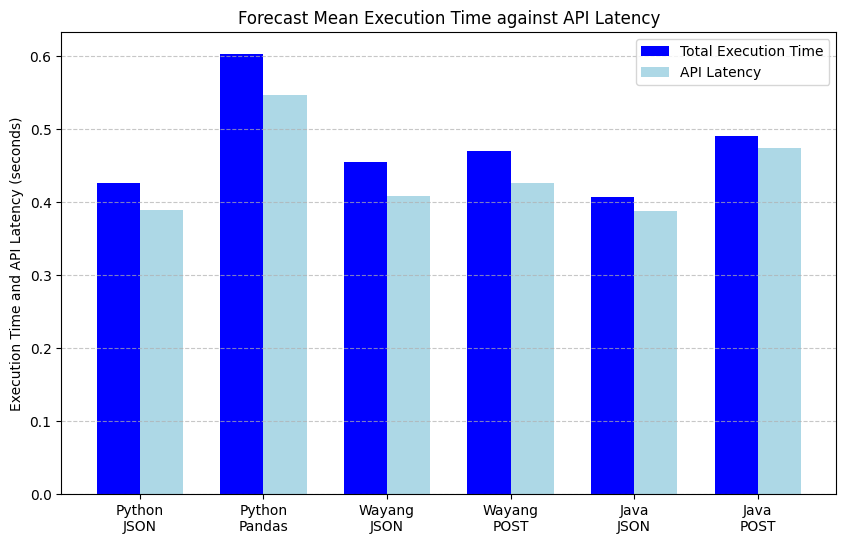

In [20]:
json_filtered_api = jsonq[jsonq['step'] == "Forecast API"]
pandas_filtered_api = pandasq[pandasq['step'] == "Forecast API"]
json_filtered_query = jsonq[jsonq['step'] == "Forecast Entire Query Process"]
pandas_filtered_query = pandasq[pandasq['step'] == "Forecast Entire Query Process"]

wayang_json_filtered_api = wayang_jsonq_api[wayang_jsonq_api['base_url'] == "api.forecastapp.com"]
wayang_post_filtered_api = wayang_postq_api[wayang_postq_api['base_url'] == "api.forecastapp.com"]
wayang_json_filtered_query = wayang_jsonq[wayang_jsonq['step'] == "Forecast Entire Query Process"]
wayang_post_filtered_query = wayang_postq[wayang_postq['step'] == "Forecast Entire Query Process"]

java_json_filtered_api = java_jsonq_api[java_jsonq_api['base_url'] == "api.forecastapp.com"]
java_post_filtered_api = java_postq_api[java_postq_api['base_url'] == "api.forecastapp.com"]
java_json_filtered_query = java_jsonq[java_jsonq['step'] == "Forecast Entire Query Process"]
java_post_filtered_query = java_postq[java_postq['step'] == "Forecast Entire Query Process"]

json_mean_execution = json_filtered_query['execution_time_seconds'].mean()
json_mean_latency = json_filtered_api['latency_seconds'].mean()
pandas_mean_execution = pandas_filtered_query['execution_time_seconds'].mean()
pandas_mean_latency = pandas_filtered_api['latency_seconds'].mean()

wayang_json_mean_execution = wayang_json_filtered_query['execution_time_seconds'].mean()
wayang_json_mean_latency = wayang_json_filtered_api['latency_seconds'].mean()
wayang_post_mean_execution = wayang_post_filtered_query['execution_time_seconds'].mean()
wayang_post_mean_latency = wayang_post_filtered_api['latency_seconds'].mean()

java_json_mean_execution = java_json_filtered_query['execution_time_seconds'].mean()
java_json_mean_latency = java_json_filtered_api['latency_seconds'].mean()
java_post_mean_execution = java_post_filtered_query['execution_time_seconds'].mean()
java_post_mean_latency = java_post_filtered_api['latency_seconds'].mean()

latency_execution_ratios = [
    json_mean_latency / json_mean_execution,
    pandas_mean_latency / pandas_mean_execution,
    wayang_json_mean_latency / wayang_json_mean_execution,
    wayang_post_mean_latency / wayang_post_mean_execution,
    java_json_mean_latency / java_json_mean_execution,
    java_post_mean_latency / java_post_mean_execution
]

# Calculating the mean of all these ratios
mean_latency_execution_ratio = sum(latency_execution_ratios) / len(latency_execution_ratios)
print(mean_latency_execution_ratio)


sources = ['Python JSON', 'Python Pandas', 'Wayang JSON', 'Wayang POST', 'Java JSON','Java POST']
execution_means = [json_mean_execution, pandas_mean_execution, wayang_json_mean_execution, wayang_post_mean_execution, java_json_mean_execution, java_post_mean_execution]
latency_means = [json_mean_latency, pandas_mean_latency, wayang_json_mean_latency, wayang_post_mean_latency, java_json_mean_latency, java_post_mean_latency]

x = np.arange(len(sources)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

execution_bars = ax.bar(x - width/2, execution_means, width, label='Total Execution Time', color='blue')
latency_bars = ax.bar(x + width/2, latency_means, width, label='API Latency', color='lightblue')

ax.set_ylabel('Execution Time and API Latency (seconds)')
ax.set_title('Forecast Mean Execution Time against API Latency')
ax.set_xticks(x)
x_labels = [
    "Python\nJSON",
    "Python\nPandas",
    "Wayang\nJSON",
    "Wayang\nPOST",
    "Java\nJSON",
    "Java\nPOST",
]
ax.set_xticklabels(x_labels)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

0.9390477778178125


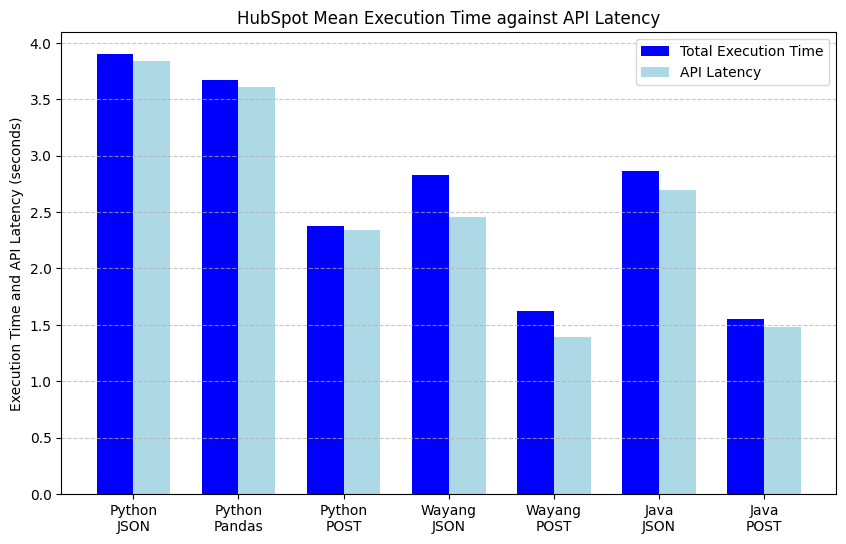

In [21]:
json_filtered_api = jsonq[jsonq['step'] == "HubSpot API"]
pandas_filtered_api = pandasq[pandasq['step'] == "HubSpot API"]
post_filtered_api = postq[postq['step'] == "HubSpot POST API"]

json_filtered_query = jsonq[jsonq['step'] == "HubSpot Entire Query Process"]
pandas_filtered_query = pandasq[pandasq['step'] == "HubSpot Entire Query Process"]
post_filtered_query = postq[postq['step'] == "HubSpot Entire Query Process"]

wayang_json_filtered_api = wayang_jsonq_api[wayang_jsonq_api['base_url'] == "api.hubapi.com"]
wayang_post_filtered_api = wayang_postq_api[wayang_postq_api['base_url'] == "api.hubapi.com"]
wayang_json_filtered_query = wayang_jsonq[wayang_jsonq['step'] == "HubSpot Entire Query Process"]
wayang_post_filtered_query = wayang_postq[wayang_postq['step'] == "HubSpot Entire Query Process"]

java_json_filtered_api = java_jsonq_api[java_jsonq_api['base_url'] == "api.hubapi.com"]
java_post_filtered_api = java_postq_api[java_postq_api['base_url'] == "api.hubapi.com"]
java_json_filtered_query = java_jsonq[java_jsonq['step'] == "Hubspot Entire Query Process"]
java_post_filtered_query = java_postq[java_postq['step'] == "Hubspot Entire Query Process"]

json_mean_execution = json_filtered_query['execution_time_seconds'].mean()
json_mean_latency = json_filtered_api['latency_seconds'].mean()
pandas_mean_execution = pandas_filtered_query['execution_time_seconds'].mean()
pandas_mean_latency = pandas_filtered_api['latency_seconds'].mean()
post_mean_execution = post_filtered_query['execution_time_seconds'].mean()
post_mean_latency = post_filtered_api['latency_seconds'].mean()

wayang_json_mean_execution = wayang_json_filtered_query['execution_time_seconds'].mean()
wayang_json_mean_latency = wayang_json_filtered_api['latency_seconds'].mean()
wayang_post_mean_execution = wayang_post_filtered_query['execution_time_seconds'].mean()
wayang_post_mean_latency = wayang_post_filtered_api['latency_seconds'].mean()

java_json_mean_execution = java_json_filtered_query['execution_time_seconds'].mean()
java_json_mean_latency = java_json_filtered_api['latency_seconds'].mean()
java_post_mean_execution = java_post_filtered_query['execution_time_seconds'].mean()
java_post_mean_latency = java_post_filtered_api['latency_seconds'].mean()

latency_execution_ratios = [
    json_mean_latency / json_mean_execution,
    pandas_mean_latency / pandas_mean_execution,
    post_mean_latency / post_mean_execution,
    wayang_json_mean_latency / wayang_json_mean_execution,
    wayang_post_mean_latency / wayang_post_mean_execution,
    java_json_mean_latency / java_json_mean_execution,
    java_post_mean_latency / java_post_mean_execution
]

# Calculating the mean of all these ratios
mean_latency_execution_ratio = sum(latency_execution_ratios) / len(latency_execution_ratios)
print(mean_latency_execution_ratio)

sources = ['Python JSON', 'Python Pandas', 'Python POST','Wayang JSON', 'Wayang POST', 'Java JSON','Java POST']
execution_means = [json_mean_execution, pandas_mean_execution,post_mean_execution, wayang_json_mean_execution, wayang_post_mean_execution, java_json_mean_execution, java_post_mean_execution]
latency_means = [json_mean_latency, pandas_mean_latency,post_mean_latency,wayang_json_mean_latency, wayang_post_mean_latency, java_json_mean_latency, java_post_mean_latency]

x = np.arange(len(sources)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

execution_bars = ax.bar(x - width/2, execution_means, width, label='Total Execution Time', color='blue')
latency_bars = ax.bar(x + width/2, latency_means, width, label='API Latency', color='lightblue')

ax.set_ylabel('Execution Time and API Latency (seconds)')
ax.set_title('HubSpot Mean Execution Time against API Latency')
ax.set_xticks(x)
x_labels = [
    "Python\nJSON",
    "Python\nPandas",
    "Python\nPOST",
    "Wayang\nJSON",
    "Wayang\nPOST",
    "Java\nJSON",
    "Java\nPOST",
]
ax.set_xticklabels(x_labels)
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

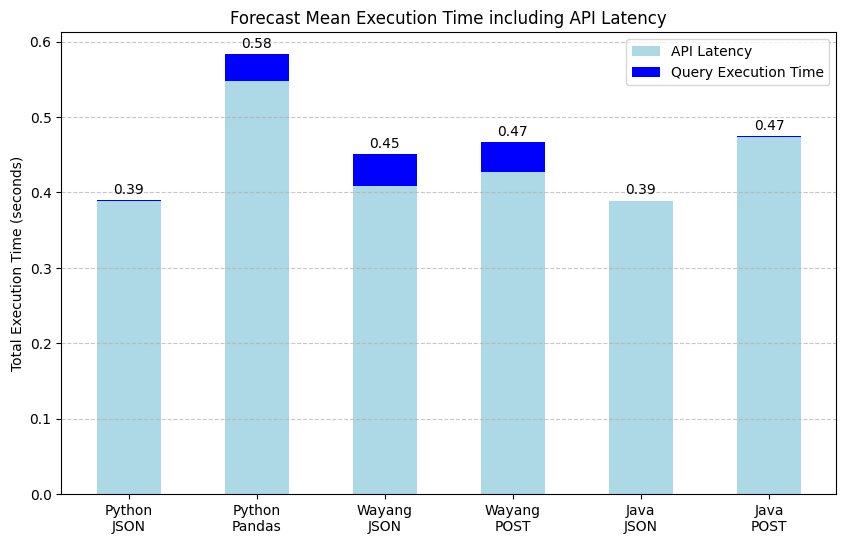

In [22]:
json_filtered_api = jsonq[jsonq['step'] == "Forecast API"]
pandas_filtered_api = pandasq[pandasq['step'] == "Forecast API"]
json_filtered_query = jsonq[jsonq['step'] == "Forecast Query"]
pandas_filtered_query = pandasq[pandasq['step'] == "Forecast Query"]

wayang_json_filtered_api = wayang_jsonq_api[wayang_jsonq_api['base_url'] == "api.forecastapp.com"]
wayang_post_filtered_api = wayang_postq_api[wayang_postq_api['base_url'] == "api.forecastapp.com"]
wayang_json_filtered_query = wayang_jsonq[wayang_jsonq['step'] == "Forecast Query"]['execution_time_seconds'].reset_index(drop = True) - wayang_jsonq_api[wayang_jsonq_api['base_url'] == "api.forecastapp.com"]['latency_seconds'].reset_index(drop=True)
wayang_post_filtered_query = wayang_postq[wayang_postq['step'] == "Forecast Query"]['execution_time_seconds'].reset_index(drop = True) - wayang_postq_api[wayang_postq_api['base_url'] == "api.forecastapp.com"]['latency_seconds'].reset_index(drop=True)

java_json_filtered_api = java_jsonq_api[java_jsonq_api['base_url'] == "api.forecastapp.com"]
java_post_filtered_api = java_postq_api[java_postq_api['base_url'] == "api.forecastapp.com"]
java_json_filtered_query = java_jsonq[java_jsonq['step'] == "Forecast Query"]
java_post_filtered_query = java_postq[java_postq['step'] == "Forecast Query"]

json_mean_execution = json_filtered_query['execution_time_seconds'].mean()
json_mean_latency = json_filtered_api['latency_seconds'].mean()
pandas_mean_execution = pandas_filtered_query['execution_time_seconds'].mean()
pandas_mean_latency = pandas_filtered_api['latency_seconds'].mean()

wayang_json_mean_execution = wayang_json_filtered_query.mean()
wayang_json_mean_latency = wayang_json_filtered_api['latency_seconds'].mean()
wayang_post_mean_execution = wayang_post_filtered_query.mean()
wayang_post_mean_latency = wayang_post_filtered_api['latency_seconds'].mean()

java_json_mean_execution = java_json_filtered_query['execution_time_seconds'].mean()
java_json_mean_latency = java_json_filtered_api['latency_seconds'].mean()
java_post_mean_execution = java_post_filtered_query['execution_time_seconds'].mean()
java_post_mean_latency = java_post_filtered_api['latency_seconds'].mean()

sources = ['Python JSON', 'Python Pandas', 'Wayang JSON', 'Wayang POST', 'Java JSON','Java POST']
execution_means = [json_mean_execution, pandas_mean_execution, wayang_json_mean_execution, wayang_post_mean_execution, java_json_mean_execution, java_post_mean_execution]
latency_means = [json_mean_latency, pandas_mean_latency, wayang_json_mean_latency, wayang_post_mean_latency, java_json_mean_latency, java_post_mean_latency]

x = np.arange(len(sources)) 
width = 0.5 

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
latency_bars = ax.bar(x, latency_means, width, label='API Latency', color='lightblue')
execution_bars = ax.bar(x, execution_means, width, bottom=latency_means, label='Query Execution Time', color='blue')

# Add totals at the top of the stacked bars
totals = [latency + execution for latency, execution in zip(latency_means, execution_means)]
for i, total in enumerate(totals):
    ax.text(x[i], total + 0.005, f'{total:.2f}', ha='center', va='bottom', fontsize=10)

# Labeling the chart
ax.set_ylabel('Total Execution Time (seconds)')
ax.set_title('Forecast Mean Execution Time including API Latency')
ax.set_xticks(x)
x_labels = [
    "Python\nJSON",
    "Python\nPandas",
    "Wayang\nJSON",
    "Wayang\nPOST",
    "Java\nJSON",
    "Java\nPOST",
]
ax.set_xticklabels(x_labels)
ax.legend()

# Grid and display
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
json_filtered_api = jsonq[jsonq['step'] == "HubSpot API"]
pandas_filtered_api = pandasq[pandasq['step'] == "HubSpot API"]
post_filtered_api = postq[postq['step'] == "HubSpot POST API"]

json_filtered_query = jsonq[jsonq['step'] == "HubSpot Query"]
pandas_filtered_query = pandasq[pandasq['step'] == "HubSpot Query"]
post_filtered_query = postq[postq['step'] == "HubSpot Query"]

wayang_json_filtered_api = wayang_jsonq_api[wayang_jsonq_api['base_url'] == "api.hubapi.com"]
wayang_post_filtered_api = wayang_postq_api[wayang_postq_api['base_url'] == "api.hubapi.com"]
wayang_json_filtered_query = wayang_jsonq[wayang_jsonq['step'] == "HubSpot Query"]
wayang_post_filtered_query = wayang_postq[wayang_postq['step'] == "HubSpot Query"]

java_json_filtered_api = java_jsonq_api[java_jsonq_api['base_url'] == "api.hubapi.com"]
java_post_filtered_api = java_postq_api[java_postq_api['base_url'] == "api.hubapi.com"]
java_json_filtered_query = java_jsonq[java_jsonq['step'] == "HubSpot Query"]
java_post_filtered_query = java_postq[java_postq['step'] == "HubSpot Query"]

json_mean_execution = json_filtered_query['execution_time_seconds'].mean()
json_mean_latency = json_filtered_api['latency_seconds'].mean()
pandas_mean_execution = pandas_filtered_query['execution_time_seconds'].mean()
pandas_mean_latency = pandas_filtered_api['latency_seconds'].mean()
post_mean_execution = post_filtered_query['execution_time_seconds'].mean()
post_mean_latency = post_filtered_api['latency_seconds'].mean()

wayang_json_mean_execution = wayang_json_filtered_query['execution_time_seconds'].mean()
wayang_json_mean_latency = wayang_json_filtered_api['latency_seconds'].mean()
wayang_post_mean_execution = wayang_post_filtered_query['execution_time_seconds'].mean()
wayang_post_mean_latency = wayang_post_filtered_api['latency_seconds'].mean()

java_json_mean_execution = java_json_filtered_query['execution_time_seconds'].mean()
java_json_mean_latency = java_json_filtered_api['latency_seconds'].mean()
java_post_mean_execution = java_post_filtered_query['execution_time_seconds'].mean()
java_post_mean_latency = java_post_filtered_api['latency_seconds'].mean()

sources = ['Python JSON', 'Python Pandas', 'Python POST','Wayang JSON', 'Wayang POST', 'Java JSON','Java POST']
execution_means = [json_mean_execution, pandas_mean_execution,post_mean_execution, wayang_json_mean_execution, wayang_post_mean_execution, java_json_mean_execution, java_post_mean_execution]
latency_means = [json_mean_latency, pandas_mean_latency,post_mean_latency,wayang_json_mean_latency, wayang_post_mean_latency, java_json_mean_latency, java_post_mean_latency]

x = np.arange(len(sources)) 
width = 0.5 

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
latency_bars = ax.bar(x, latency_means, width, label='API Latency', color='lightblue')
execution_bars = ax.bar(x, execution_means, width, bottom=latency_means, label='Query Execution Time', color='blue')

# Add totals at the top of the stacked bars
totals = [latency + execution for latency, execution in zip(latency_means, execution_means)]
for i, total in enumerate(totals):
    ax.text(x[i], total + 0.01, f'{total:.2f}', ha='center', va='bottom', fontsize=10)

# Labeling the chart
ax.set_ylabel('Total Execution Time (seconds)')
ax.set_title('HubSpot Mean Execution Time including API Latency')
ax.set_xticks(x)
x_labels = [
    "Python\nJSON",
    "Python\nPandas",
    "Python\nPOST",
    "Wayang\nJSON",
    "Wayang\nPOST",
    "Java\nJSON",
    "Java\nPOST",
]
ax.set_xticklabels(x_labels)
ax.legend()

# Grid and display
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Table

#### JSON

In [ ]:
jsonq[jsonq['step'] == 'Forecast API']['latency_seconds'].describe()

In [ ]:
jsonq[jsonq['step'] == 'HubSpot API']['latency_seconds'].describe()

In [ ]:
jsonq[jsonq['step'] == 'Forecast Query']['execution_time_seconds'].describe()

In [ ]:
jsonq[jsonq['step'] == 'HubSpot Query']['execution_time_seconds'].describe()

In [ ]:
jsonq[jsonq['step'] == 'Forecast Entire Query Process']['execution_time_seconds'].describe()

In [ ]:
jsonq[jsonq['step'] == 'HubSpot Entire Query Process']['execution_time_seconds'].describe()

#### Pandas

In [ ]:
pandasq[pandasq['step'] == 'Forecast API']['latency_seconds'].describe()

In [ ]:
pandasq[pandasq['step'] == 'HubSpot API']['latency_seconds'].describe()

In [ ]:
pandasq[pandasq['step'] == 'Forecast Query']['execution_time_seconds'].describe()

In [ ]:
pandasq[pandasq['step'] == 'HubSpot Query']['execution_time_seconds'].describe()

In [ ]:
pandasq[pandasq['step'] == 'Forecast Entire Query Process']['execution_time_seconds'].describe()

In [ ]:
pandasq[pandasq['step'] == 'HubSpot Entire Query Process']['execution_time_seconds'].describe()

#### POST

In [ ]:
postq[postq['step'] == 'Forecast API']['latency_seconds'].describe()

In [ ]:
postq[postq['step'] == 'HubSpot POST API']['latency_seconds'].describe()

In [ ]:
postq[postq['step'] == 'Forecast Query']['execution_time_seconds'].describe()

In [ ]:
postq[postq['step'] == 'HubSpot Query']['execution_time_seconds'].describe()

In [ ]:
postq[postq['step'] == 'Forecast Entire Query Process']['execution_time_seconds'].describe()

In [ ]:
postq[postq['step'] == 'HubSpot Entire Query Process']['execution_time_seconds'].describe()

### Wayang

#### JSON

In [ ]:
wayang_jsonq_api[wayang_jsonq_api['base_url'] == 'api.forecastapp.com']['latency_seconds'].describe()

In [ ]:
wayang_jsonq_api[wayang_jsonq_api['base_url'] == 'api.hubapi.com']['latency_seconds'].describe()

In [ ]:
(wayang_jsonq[wayang_jsonq['step'] == "Forecast Query"]['execution_time_seconds'].reset_index(drop = True) - wayang_jsonq_api[wayang_jsonq_api['base_url'] == "api.forecastapp.com"]['latency_seconds'].reset_index(drop=True)).describe()

In [ ]:
wayang_jsonq[wayang_jsonq['step'] == 'HubSpot Query'].describe()

In [ ]:
wayang_jsonq[wayang_jsonq['step'] == 'Forecast Entire Query Process'].describe()

In [ ]:
wayang_jsonq[wayang_jsonq['step'] == 'HubSpot Entire Query Process'].describe()

#### POST

In [ ]:
wayang_postq_api[wayang_postq_api['base_url'] == 'api.forecastapp.com']['latency_seconds'].describe()

In [ ]:
wayang_postq_api[wayang_postq_api['base_url'] == 'api.hubapi.com']['latency_seconds'].describe()

In [ ]:
(wayang_postq[wayang_postq['step'] == "Forecast Query"]['execution_time_seconds'].reset_index(drop = True) - wayang_postq_api[wayang_postq_api['base_url'] == "api.forecastapp.com"]['latency_seconds'].reset_index(drop=True)).describe()

In [ ]:
wayang_postq[wayang_postq['step'] == 'HubSpot Query'].describe()

In [ ]:
wayang_postq[wayang_postq['step'] == 'Forecast Entire Query Process'].describe()

In [ ]:
wayang_postq[wayang_postq['step'] == 'HubSpot Entire Query Process'].describe()

### Java

#### JSON

In [ ]:
java_jsonq_api[java_jsonq_api['base_url'] == 'api.forecastapp.com']['latency_seconds'].describe()

In [ ]:
java_jsonq_api[java_jsonq_api['base_url'] == 'api.hubapi.com']['latency_seconds'].describe()

In [ ]:
java_jsonq[java_jsonq['step'] == 'Forecast Query']['execution_time_seconds'].describe()

In [ ]:
java_jsonq[java_jsonq['step'] == 'HubSpot Query'].describe()

In [ ]:
java_jsonq[java_jsonq['step'] == 'Forecast Entire Query Process'].describe()

In [ ]:
java_jsonq[java_jsonq['step'] == 'Hubspot Entire Query Process'].describe()

#### POST

In [ ]:
java_postq_api[java_postq_api['base_url'] == 'api.forecastapp.com']['latency_seconds'].describe()

In [ ]:
java_postq_api[java_postq_api['base_url'] == 'api.hubapi.com']['latency_seconds'].describe()

In [ ]:
java_postq[java_postq['step'] == 'Forecast Query']['execution_time_seconds'].describe()

In [ ]:
java_postq[java_postq['step'] == 'HubSpot Query'].describe()

In [ ]:
java_postq[java_postq['step'] == 'Forecast Entire Query Process'].describe()

In [ ]:
java_postq[java_postq['step'] == 'Hubspot Entire Query Process'].describe()

### Resource consumption

#### Python

In [ ]:
python_jsonq_r = pd.read_json('Results/Python/JSON/resource_usage.json')

In [ ]:
python_jsonq_r[python_jsonq_r['cpu_percent'] != 0.0][['cpu_percent','memory_percent']].describe()

In [ ]:
python_pandasq_r = pd.read_json('Results/Python/PANDAS/resource_usage.json')

In [ ]:
python_pandasq_r[python_pandasq_r['cpu_percent'] != 0.0][['cpu_percent','memory_percent']].describe()

In [ ]:
python_postq_r = pd.read_json('Results/Python/POST/resource_usage.json')

In [ ]:
python_postq_r[python_postq_r['cpu_percent'] != 0.0][['cpu_percent','memory_percent']].describe()

#### Wayang

In [ ]:
wayang_jsonq_r = pd.read_json('Results/Wayang/JSON/resource_usage.json')

In [ ]:
wayang_jsonq_r[['cpu_percent','memory_percent']].describe()

In [ ]:
wayang_postq_r = pd.read_json('Results/Wayang/POST/resource_usage.json')

In [ ]:
wayang_postq_r[['cpu_percent','memory_percent']].describe()

#### Java

In [ ]:
java_jsonq_r = pd.read_json('Results/Standalone/JSON/resource_usage.json')

In [ ]:
java_jsonq_r[['cpu_percent','memory_percent']].describe()

In [ ]:
java_postq_r = pd.read_json('Results/Standalone/POST/resource_usage.json')

In [ ]:
java_postq_r[['cpu_percent','memory_percent']].describe()

#### Usage plot

In [ ]:
combined_cpu_df = pd.DataFrame({
    'Python JSON Query': python_jsonq_r[python_jsonq_r['cpu_percent'] != 0.0]['cpu_percent'],
    'Python Pandas Query': python_pandasq_r[python_pandasq_r['cpu_percent'] != 0.0]['cpu_percent'],
    'Python POST Query': python_postq_r[python_postq_r['cpu_percent'] != 0.0]['cpu_percent'],
    'Wayang JSON Query': wayang_jsonq_r['cpu_percent'],
    'Wayang POST Query': wayang_postq_r['cpu_percent'],
    'Java JSON Query': java_jsonq_r['cpu_percent'],
    'Java POST Query': java_postq_r['cpu_percent'],
})

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot Group 1: Python Queries
combined_cpu_df.iloc[:, :3].plot(
    kind='line',
    ax=axes[0],
    alpha=0.5,
    linewidth=1.5,
)
axes[0].set_title("Group 1: Python Queries", fontsize=16, fontweight='bold', color='darkblue')
axes[0].set_ylabel("CPU Utilization (%)", fontsize=10)
axes[0].grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
axes[0].legend(fontsize=12)

# Plot Group 2: Wayang and Java Queries
combined_cpu_df.iloc[:, 3:].plot(
    kind='line',
    ax=axes[1],
    alpha=0.5,
    linewidth=1.5,
)
axes[1].set_title("Group 2: Wayang and Java Queries", fontsize=16, fontweight='bold', color='darkgreen')
axes[1].set_ylabel("CPU Utilization (%)", fontsize=10)
axes[1].grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
axes[1].legend(fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()
